In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 

In [2]:
spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)
tauGyr = galaxy_properties['tauGyr']

In [3]:

random.seed() # for reproducibility
rows = [random.randint(0, len(spectra)) for i in range(3)]  # select three random galaxy spectrums to visualize


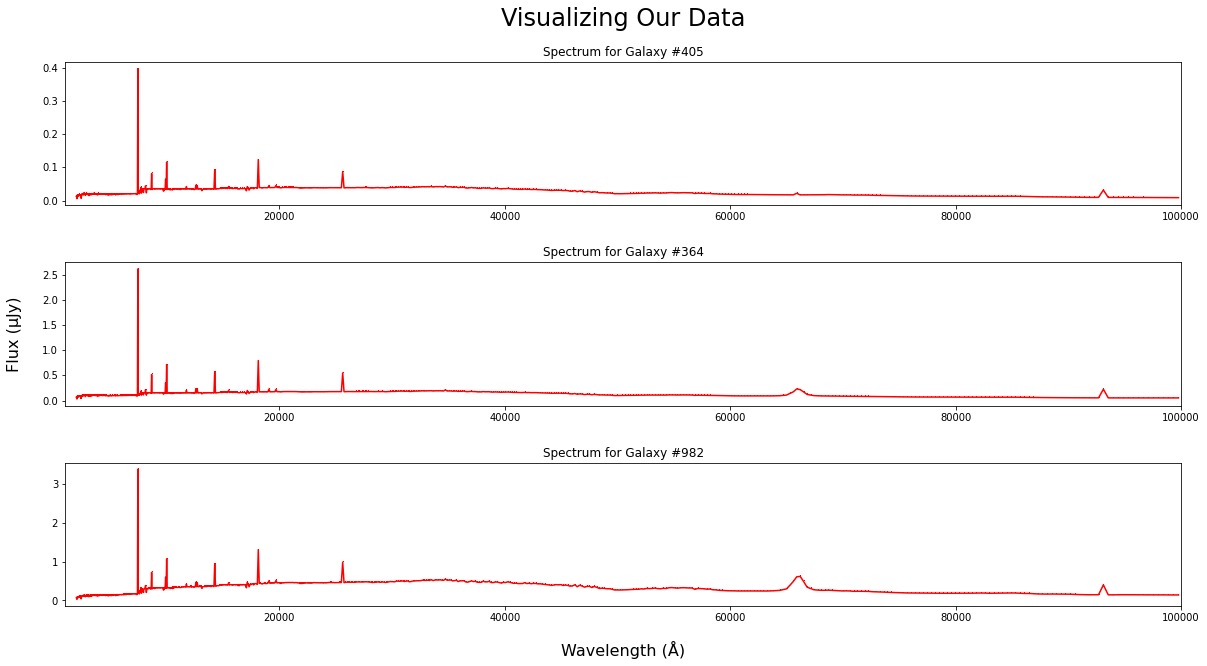

In [4]:

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
ax = fig.add_subplot(111) # Generating subplots for our figure; see https://stackoverflow.com/a/6981055/3135556
ax1 = fig.add_subplot(311) # 3 rows, 1 column, plot at position 1
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(wavelengths, spectra.loc[rows[0]], 'r,-')
ax2.plot(wavelengths, spectra.loc[rows[1]], 'r,-')
ax3.plot(wavelengths, spectra.loc[rows[2]], 'r,-')

ax1.set_xlim(1000, 100000) # restrict the x-axis to mitigate the gap that exists around x=0
ax2.set_xlim(1000, 100000)
ax3.set_xlim(1000, 100000)

# Set common labels
ax.set_xlabel("Wavelength (Å)", fontsize=16, labelpad=18)
ax.set_ylabel("Flux (μJy)", fontsize=16, labelpad=20)
ax.set_title("Visualizing Our Data", fontsize=24, pad=36)

ax1.set_title("Spectrum for Galaxy #" + str(rows[0]))
ax2.set_title("Spectrum for Galaxy #" + str(rows[1]))
ax3.set_title("Spectrum for Galaxy #" + str(rows[2]))

plt.subplots_adjust(hspace=0.4) # increase vertical distance between subplots

In [5]:
wavelengths

,0
0,1995.952
1,2005.169
2,2014.430
3,2023.732
4,2033.078
...,...
845,97947.983
846,98400.317
847,98854.740
848,99311.262


In [6]:
tauGyr

0      0.033035
1      0.087146
2      1.273974
3      0.242588
4      0.510683
         ...   
995    2.069916
996    0.062845
997    0.918643
998    0.168273
999    3.523973
Name: tauGyr, Length: 1000, dtype: float64

Text(0, 0.5, 'Tau (Giga Years)')

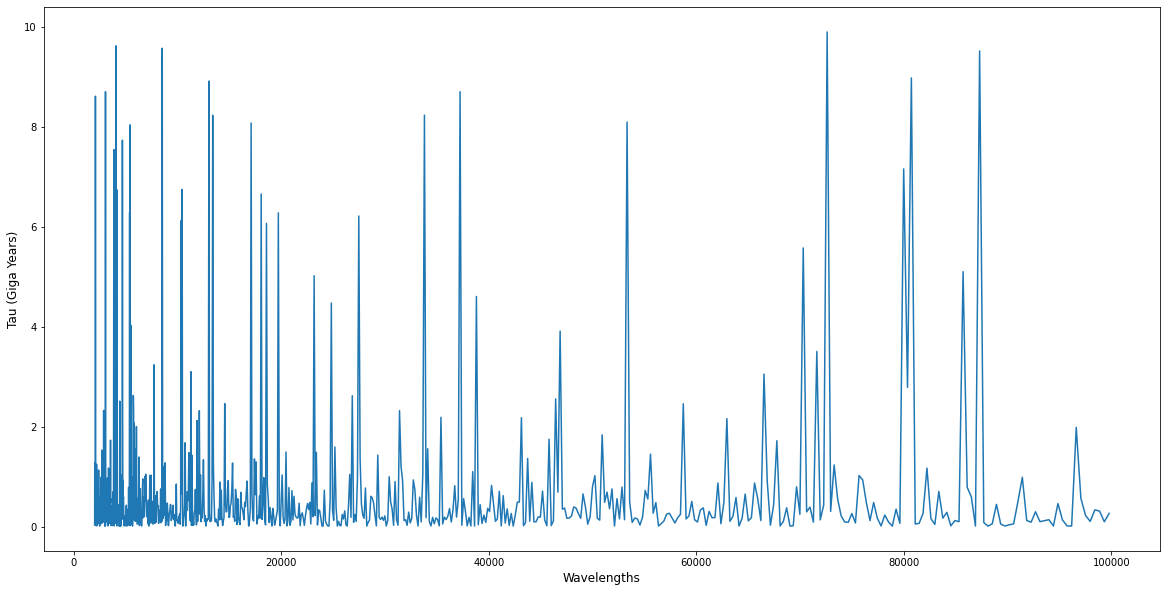

In [7]:
plt.plot(wavelengths, tauGyr[0:850])
plt.xlabel('Wavelengths', fontsize = 12)
plt.ylabel('Tau (Giga Years)', fontsize = 12)


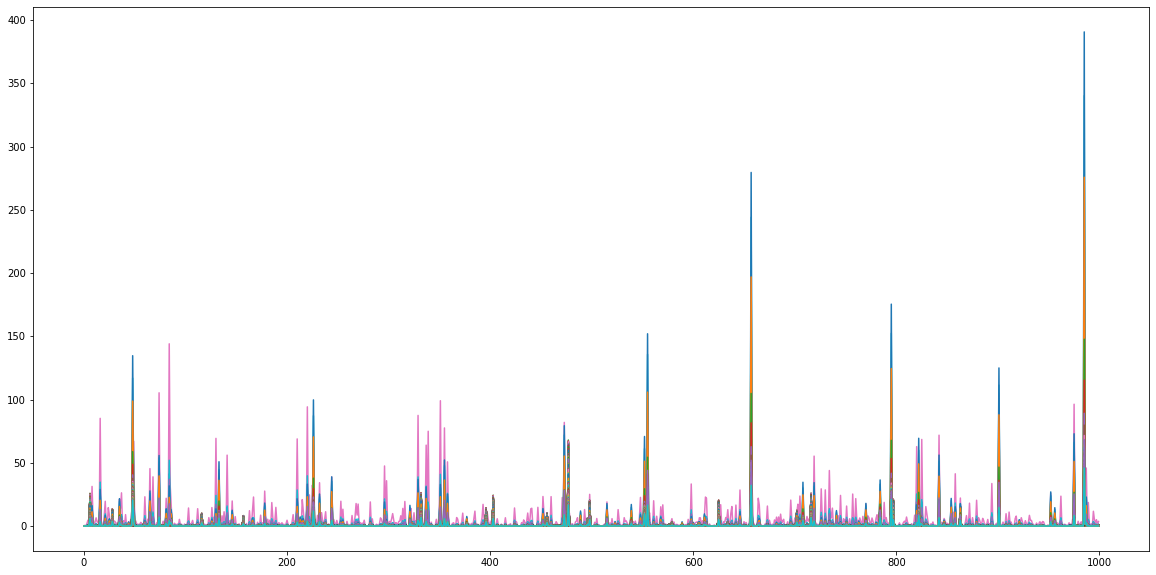

In [8]:
plt.plot(spectra, label = 'Inline Label');

In [9]:
def sigmoid (x,deriv=False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [10]:
X = np.array((spectra), dtype=np.float128)
Y = np.array((tauGyr), dtype=np.float128)

In [11]:
spectra

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,0.010532,0.011854,0.011477,0.011186,0.010723,0.007781,0.003281,0.007836,0.008751,0.012667,...,0.024035,0.023810,0.024046,0.023865,0.023751,0.023780,0.023700,0.023532,0.023523,0.023560
1,0.012206,0.013479,0.013350,0.013068,0.013404,0.011025,0.005107,0.011005,0.012001,0.014975,...,0.045495,0.044942,0.045321,0.044943,0.044721,0.044843,0.044598,0.043910,0.043594,0.043794
2,0.003660,0.004010,0.004001,0.003920,0.004109,0.003515,0.001691,0.003498,0.003792,0.004505,...,0.016169,0.015951,0.016057,0.015907,0.015811,0.015818,0.015722,0.015475,0.015348,0.015374
3,0.065447,0.071665,0.071253,0.069657,0.072569,0.061464,0.029246,0.060936,0.065971,0.078945,...,0.052733,0.051933,0.052260,0.051681,0.051270,0.051238,0.050767,0.049790,0.049233,0.049177
4,0.143073,0.156413,0.155725,0.152241,0.159254,0.135972,0.065265,0.134719,0.145695,0.172647,...,0.071784,0.070843,0.071313,0.070579,0.070022,0.069911,0.069362,0.068354,0.067859,0.067661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.084785,0.092999,0.092949,0.091197,0.095809,0.082226,0.039687,0.082043,0.089028,0.105681,...,0.237033,0.234978,0.237017,0.236048,0.235719,0.236943,0.236522,0.234346,0.233746,0.235702
996,0.014452,0.015888,0.016062,0.015868,0.017012,0.015016,0.007340,0.015144,0.016453,0.019114,...,0.116852,0.117667,0.119247,0.120329,0.121477,0.123043,0.124556,0.126414,0.128591,0.131057
997,0.153889,0.168172,0.167482,0.163732,0.171433,0.146658,0.070557,0.145284,0.157084,0.185707,...,0.077033,0.076005,0.076492,0.075710,0.075119,0.075009,0.074406,0.073292,0.072723,0.072523
998,0.025145,0.027639,0.027524,0.026976,0.028090,0.023713,0.011243,0.023641,0.025681,0.031034,...,0.054181,0.053688,0.054170,0.053871,0.053724,0.053934,0.053792,0.053276,0.053137,0.053471


In [12]:
np.random.seed(1)

In [13]:
syn0 = 2*np.random.random((850,1000))-1

In [ ]:
for i in range (100):
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    
    l1_error = Y - l1
    l1_delta = l1_error * sigmoid(l1,True)
    
    syn0 += np.dot(l0.T,l1_delta)
print (l1)

<ipython-input-9-1dfb12849be9>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [28]:
l1[1]

array([8.14039038e-1082, 5.86373149e-0127, 1.00000000e+0000,
       9.08371714e-0085, 1.00000000e+0000, 1.00000000e+0000,
       1.00000000e+0000, 1.25982538e-0473, 1.00000000e+0000,
       1.00000000e+0000, 1.00000000e+0000, 1.51627321e-0946,
       2.26276893e-0171, 1.00000000e+0000, 1.00000000e+0000,
       2.65930214e-0159, 2.25214428e-0026, 1.00000000e+0000,
       1.69031505e-0116, 8.95422361e-0010, 1.00000000e+0000,
       1.00000000e+0000, 1.11001650e-0735, 1.50797488e-0295,
       5.82939349e-0321, 1.00000000e+0000, 2.56076661e-0068,
       1.35118554e-0298, 5.23941971e-0072, 7.89612896e-0854,
       2.17345878e-0066, 1.00000000e+0000, 8.29462472e-0016,
       2.01384244e-0033, 1.42035706e-0260, 7.19048645e-0034,
       1.00000000e+0000, 1.00000000e+0000, 8.26174887e-0222,
       1.00000000e+0000, 4.22327787e-0019, 3.92880237e-0010,
       1.00000000e+0000, 9.24521523e-0263, 5.68336194e-0278,
       3.24424826e-0036, 1.00000000e+0000, 1.71366500e-0089,
       3.17168975e-0109,

In [27]:
np.shape(Y)

(1000,)

Text(0, 0.5, 'Predicted Tau (Giga Years)')

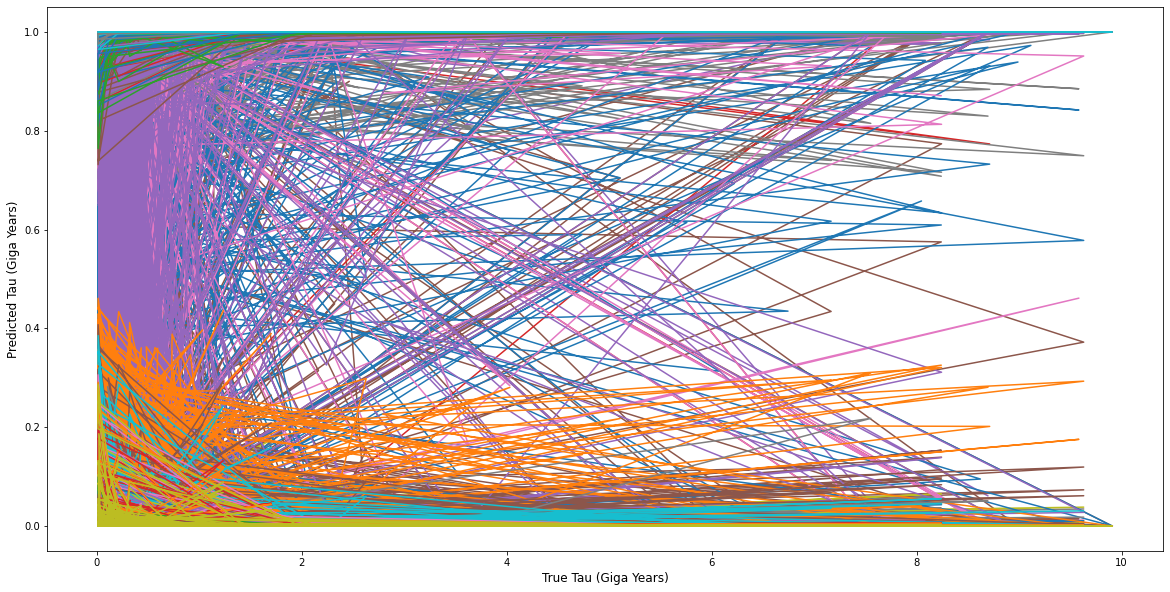

In [33]:
plt.plot(Y,l1)
plt.xlabel('True Tau (Giga Years)', fontsize = 12)
plt.ylabel('Predicted Tau (Giga Years)', fontsize = 12)

In [40]:
print(((l1==Y)))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
def Forward_Propagation(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # First layer
    M = 1 / (1 + np.exp(-(X.dot(Wi_1.T) + Bi_1)))
    # Second Layer
    A = M.dot(Wi_2) + Bi_2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1)
    return Y,M

In [ ]:
Forward_Propagation(spectra, Wi_1, Bi_1, Wi_2, Bi_2)

In [ ]:
def diff_Wi_1(X,H,Z, output, Wi_2):
    dZ = (Z-output).dot(Wi_2.T)*H*(1-H)
    return X.T.dot(dZ)
 
def diff_Wi_2(H,Z,Y):
    return H.T.dot(Z-Y)

def diff_B2(Z,Y):
    return (Z-Y).sum(axis=0)

def diff_B1(Z,Y, Wi_2, H):
    return ((Z-Y).dot(Wi_2.T)*H*(1-H)).sum(axis=0)



In [ ]:
learning_rate = 1e-3
for epoch in range (5000):
    output, hidden = Forward_Propagation(spectra, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate + diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate + diff_B2(Z, output)
    Wi_1 += learning_rate + diff_Wi_1(X, hidden, Z, output, Wi_2).y
    Bi_1 += learning_rate + diff_B1(Z, output, Wi_2, hidden)


In [ ]:
print(spectra.dtypes)


In [ ]:
print(spectra.describe())

In [ ]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,850]
df = spectra[spectra.columns[cols]]

In [ ]:
df

In [ ]:
for i in df.columns:
    print(df[i].isnull().value_counts()) 

In [ ]:
print(df.corr())

In [ ]:
fig, a =  plt.subplots(1,3, figsize = (18, 5))
a[0].scatter(df[2], df['Properties'], color = 'c')
a[0].set_title('Flux vs tauGyr')
a[0].set_xlabel('Flux # 2')
a[1].scatter(df[5], df['Properties'], color = 'm')
a[1].set_title('Flux vs tauGyr')
a[1].set_xlabel('Flux # 5')
a[2].scatter(df[10], df['Properties'], color = 'b')
a[2].set_title('Flux vs tauGyr')
a[2].set_xlabel('Flux # 15')
fig.text(0.08, 0.5, 'Properties', va='center', rotation='vertical')

plt.show()

In [ ]:
cols_features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
ft = spectra[spectra.columns[cols]]
features = ft.to_numpy() #Converts the dataframe to numpy array
print(features)

In [ ]:
target = df['Properties'].to_numpy() #Converts the dataframe to numpy array
print(target)

In [ ]:
weights = np.random.rand(15) #Generates a numpy array with two small random floats
print(weights)

In [ ]:
b = np.random.rand(1) #Generates a numpy array with a small random float
bias = np.array([b[0] for i in range(len(features))])
print(bias)

In [ ]:
def linearRegr(features, weights, bias):
    """Calculates the y_hat predicted values using the given parameters of weights, dependent variables, and biases.
    Args:
        -dependant_var: Matrix of dependant variable values
        -weights: Matrix/array of weights associated with each dependant variable
        -biases: Biases for the model
    Returns:
        -Array/matrix of predicted values
    """
    y_hat = weights.dot(features.transpose()) + np.array([bias[0] for i in range(len(features))]) # Takes the value stored in the bias array and makes an array of length of feature matrix for addition
    return y_hat

In [ ]:
y_hat = linearRegr(features, weights, b)
print(y_hat)

In [ ]:
def meanSqrError(y, y_hat):
    """Calculates the total mean squared error.
    
    Args- 
        y: Array of actual target values
        y_hat: Array of predicted target values
        
    Returns-
        total mean squared error
    """
    MSE = np.sum((y - y_hat) ** 2) / len(y)
    return MSE

In [ ]:
print('Total error- {}'.format(meanSqrError(target, y_hat)))

In [ ]:
def gradient(target, features, weights, bias):
    """Returns the gradient(slopes) for weights and biases
    """  
    m = len(features)
    target_pred = linearRegr(features, weights, bias)
    loss = target - target_pred # y-y_hat
    # Gradient calculation for model bias
    grad_bias = np.array([-2/m * np.sum(loss)])
    
    grad_weights = np.ones(3)
    # Gradient calculation for first feature
    feature_0 = np.array([feature[0] for feature in features])
    grad_weights[0] = -2/m * np.sum(loss * feature_0)
    # Gradient calculation for second feature
    feature_1 = np.array([feature[1] for feature in features])
    grad_weights[1] = -2/m * np.sum(loss * feature_1)
    # Gradient calculation for third feature
    feature_2 = np.array([feature[1] for feature in features])
    grad_weights[2] = -2/m * np.sum(loss * feature_2)
    
    return grad_bias, grad_weights

In [ ]:
def stochGradDesMODIFIED(learning_rate, epochs, target, features, weights, bias):
    MSE_list = []
    for i in range(epochs):
        grad_bias, grad_weights = gradient(target, features, weights, bias)
        weights -= grad_weights.dot(learning_rate)
        bias -= grad_bias * learning_rate
        new_pred = linearRegr(features, weights, bias)
        total_MSE_new = meanSqrError(target, new_pred)
        MSE_list.append(total_MSE_new)
    
    return_dict = {'weights': weights, 'bias': bias[0], 'MSE': total_MSE_new, 'MSE_list': MSE_list}
    return return_dict

In [ ]:
model_val = stochGradDesMODIFIED(0.001, 2000, target, features, weights, bias)
print("Weights- {}\nBias- {}\nMSE- {}".format(model_val['weights'], model_val['bias'], model_val['MSE']))

In [ ]:
target

In [ ]:
features

In [ ]:
weights